<a href="https://colab.research.google.com/github/NamSugata/Aula_Python/blob/master/Exerc%C3%ADcios_aula10_1%2C2%2C3%2C4%2C5%2Cextras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios

1. Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10? 

$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 10\% $

2. Faça a integração numérica pela esquerda da mesma função. Compare o resultado com a integração pela direita.

3. Faça a integração por trapézios. Lembre que a área de um trapézio é dada por: $A=\frac{(a + b)h}{2}$

3. Faça a integração numérica das funções trigonométricas $\sin(x)$ e $\cos(x)$ num período $0 < x \leq 2\pi$

4. Faça a integração das funções hiperbólicas  $\sinh(x)$ e $\cosh(x)$ no intervalo $0-10$.

solução exercício em aula:

In [ ]:
'Exercício 01:'
x_i = 0
x_f = 10
dx = 1
r_ana = 0.9999546000702375
n_steps = round((x_f - x_i)/dx)

x = np.arange(x_i,x_f,dx)
condicao = 100

while (abs(condicao) > 0.001):
    x = np.arange(x_i,x_f,dx)
    S1= 0
    for xi in x:
        S1 = S1+ math.exp(-xi) * dx
    condicao = abs(S1 - r_ana)/r_ana
    dx = dx/10
    print(condicao,dx,S1) 
#print(f"Soma de {n_steps} caixinhas = ",S1) 

0.5819767068693262 0.1 1.5819048852379485
0.050833194477505665 0.01 1.0507854867242843
0.005008333319445099 0.001 1.0049627060117017
0.0005000833333330618 0.0001 1.0004546606998224


Soma pela esquerda = 1.0049622474496354
Soma pela direita = 0.9949627060117006


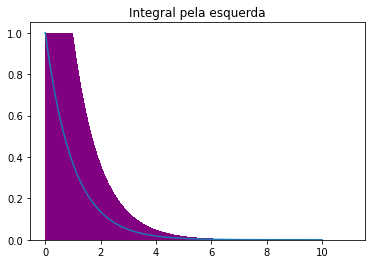

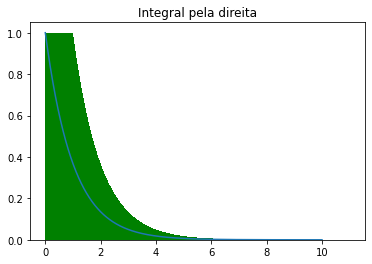

In [ ]:
'Exercício 02:'
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(-x)

def integral_esquerda(f,a,b,dx):
    x = np.arange(a,b,dx)
    sum1 = 0
    for i in range(len(x)-1):
        sum1 = sum1 + f(x[i]) * dx
    print(f'Soma pela esquerda = {sum1}')         
    return x

def integral_direita(f,a,b,dx):
    x = np.arange(a,b,dx)
    sum2 = 0
    for i in range(1,len(x)):
        sum2 = sum2 + f(x[i]) * dx
    print(f'Soma pela direita = {sum2}')      
    return x

integral_esquerda(f, a=0, b=10, dx= 0.01)
integral_direita(f, a=0, b=10, dx= 0.01)    

plt.figure(1)
plt.title('Integral pela esquerda')
y1 = [math.exp(-xi) for xi in x]
plt.bar(x, y1, color="purple", align="edge", width=1)
plt.plot(x,y1)
plt.show()

plt.figure(2)
plt.title('Integral pela direita')
y2 = [math.exp(-xi) for xi in x]
plt.bar(x, y2, color="green", align="edge", width=1)
plt.plot(x,y2)
plt.show()



In [ ]:
'Exercício 03:'

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(-x)

def trapezio(f,a,b,n=100):
    """f : função
    a , b : números
        Intervalo de Integração [a,b]
    n : inteiro
        quantidade de subintervalos entre [a,b]
    """
    x = np.linspace(a,b,n+1) # N+1 points make N subintervals
    y = f(x)
    y_direita = y[1:] # pontoa à direita
    y_esquerda = y[:-1] # pontos à esquerda
    dx = (b - a)/n
    t = (dx/2) * np.sum(y_direita + y_esquerda)
    print(f'O resultado para esta integração é: {t:}')
    return t

trapezio(f,0,10)

#plt.figure(1)
#plt.title('Integral Método: Trapézio')
#y = [math.exp(-xi) for xi in x]
#plt.bar(x, y, color="purple", align="edge", width=1)
#plt.plot(x,y)
#plt.show()


O resultado para esta integração é: 1.0007877567207717


1.0007877567207717

In [ ]:
'Exercício 04:'

from math import cos, pi
from scipy.integrate import quad

# função que vamos integrar:
def f(x):
    return cos(2*x)
# Chama o quad para integrar f de 0 até 2*pi
res, err = quad(f, 0, pi)

print("O resultado numérico é: {:f} (+-{:g})"
    .format(res, err))

O resultado numérico é: 0.000000 (+-2.23587e-14)


In [ ]:
'Exercício 04:'

from math import sin, pi
from scipy.integrate import quad

# função que vamos integrar:
def f(x):
    return sin(x)
# Chama o quad para integrar f de 0 até 2*pi
res, err = quad(f, 0, 2*pi)

print("O resultado numérico é: {:f} (+-{:g})"
    .format(res, err))

O resultado numérico é: 0.000000 (+-4.39989e-14)


In [6]:
'Exercício 05:'
from math import sinh, pi
from scipy.integrate import quad

# função que vamos integrar:
def f(x):
    return sinh(x)
# Chama o quad para integrar f de 0 até 10
res, err = quad(f, 0, 10)

print("O resultado numérico é: {:f} (+-{:g})"
    .format(res, err))

O resultado numérico é: 11012.232920 (+-3.1191e-10)


In [ ]:
'Exercício 05'
from math import cosh, pi
from scipy.integrate import quad

# função que vamos integrar:
def f(x):
    return cosh(x)
# Chama o quad para integrar f de 0 até 10
res, err = quad(f, 0, 10)

print("O resultado numérico é: {:f} (+-{:g})"
    .format(res, err))

O resultado numérico é: 11013.232875 (+-3.11972e-10)


### Exercícios extras de resolução numérica de equações diferenciais

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um péndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.


- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.


Solução dos exercícios extras:


In [47]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt
def vel(v):
    velocidade = v/60
    return velocidade 
d = 5
v = 12    
elementos = int(d/vel(v))
tempo = np.arange(0,elementos+1,1)
d = [vel(v) * t for t in tempo] 
print(d)


[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'ã' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: http://matp

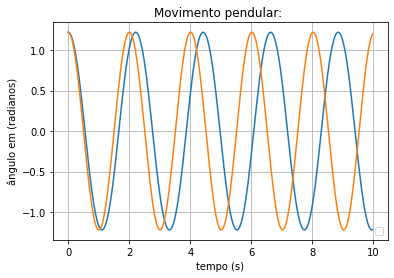

In [ ]:
'Exercício 03:'
#importando os módulos
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt

#definindo as equações
def equations(y0,t):
    theta, x = y0
    f = [x, -(g/l) * sin(theta)]
    return f

def plotar_resultados(tempo,theta1, theta2):
    plt.plot(tempo, theta1[:,0])
    plt.plot(tempo, theta2)

    plt.title('Movimento pendular: ')
    plt.xlabel('tempo (s)')
    plt.ylabel('ângulo em (radianos)')
    plt.grid(True)
    plt.legend('não-linear', 'linear', loc='lower right')
    plt.show()

#parâmetros
g = 9.8
l = 1.0
tempo = np.arange(0,10,0.025)

#condições iniciais
angulo_inicial = 70.0 #graus
theta0 = np.radians(angulo_inicial)
x0 = np.radians(0.0)

#encontrando as soluções possíveis
theta1 = odeint(equations,[theta0,x0], tempo) #não-linear
w = np.sqrt(g/l)
theta2 = [theta0 * cos(w*t)for t in tempo]

#plotar os resultados
plotar_resultados(tempo, theta1, theta2)


In [ ]:
help(quad)